# TFM Máster Data Science UAH 2020-2021

### MIGUEL PÉREZ CARO

Este notebook tiene como objetivo aplicar técnicas de análisis de sentimiento para analizar la interacción de los usuarios por Twitter hacia las aerolíneas. Para ello se hará uso del dataset limpiado y se usarán dos librerías:

- TextBlob
- VADER

En primer lugar se importan las librerías.

In [1]:
import os
import re
import string
import pandas as pd
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
import warnings
warnings.filterwarnings('ignore')

Se establece el directorio del archivo

In [3]:
directorio = os.path.dirname(os.getcwd())
mydir = os.path.join(directorio, 'data')
os.chdir(mydir)

Se carga el archivo

In [4]:
df = pd.read_csv('df_clean_no_dup.csv')

In [5]:
df.sample(5)

,id,created_at,text,retweet_count,favorite_count,southwest,american,united,delta
167883,1.422959e+18,2021-08-04 16:35:29,really yall allow pilots late flight tweet app...,0.0,0.0,1.0,0.0,0.0,0.0
141860,1.439328e+18,2021-09-18 20:38:36,never good following covid rules though,0.0,0.0,0.0,1.0,0.0,0.0
237565,1.441488e+18,2021-09-24 19:39:49,xlikex way handled really bad business,0.0,0.0,0.0,1.0,0.0,0.0
229854,1.423005e+18,2021-08-04 19:36:57,wherever get vacation deserve check dms,1.0,0.0,0.0,0.0,0.0,1.0
97433,1.439426e+18,2021-09-19 03:06:41,hidden message glaring nevermind dan post grad...,0.0,0.0,0.0,1.0,0.0,0.0


##### TextBlob

TextBlob es una librería de procesamiento de lenguaje natural que, entre sus muchas funciones, incluye una para analizar el sentimiento de un documento. Su resultado consiste en un valor de polaridad cuyo rango es de -1 a 1, de forma que todo valor menor que 0 es considerado como un texto negativo, y todo valor mayor que 0 es considerado como un texto positivo.

Para conseguir el resultado deseado podemos hacerlo simplemente con la siguiente estructura:

In [6]:
df['textblob-sentiment'] = df['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

A continuación, creamos otra columna para recoger el valor en texto, lo cual puede ser de utilidad para analizar los resultados.

In [7]:
def textblob_sentiment_texto(score): 
    """
    Función para pasar a texto el resultado del análisis de sentimiento.
    
    param: score el resultado del análisis.
    :return: Valor en texto del resultado
    """
    if score < 0:
        return 'Negativo'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positivo'

In [8]:
df['textblob-sentiment-analysis'] = df['textblob-sentiment'].apply(textblob_sentiment_texto)

##### VADER

VADER, a partir de su analizador de sentimientos, es capaz de devolver el sentimiento de un texto en un formato de diccionario con 4 elementos:

- neg: representa el resultado negativo. Rango de 0 a 1
- neu: representa el resultado neutral. Rango de 0 a 1
- pos: representa el resultado positivo. Rango de 0 a 1
- compound: es una métrica que calcula la suma de las valoraciones de todo el léxico normalizado al rango -1 a 1, consideranto negativo todo valor menor a -0.05 y positivo todo valor mayor a 0.05, siendo el resto neutro.

Por lo tanto, el dato que nos indicará el sentimiento del tweet es compound de forma que cuanto más cercano a -1, más negativo es el texto, y cuanto más cercano a 1, más positivo será el texto

El primer paso es crear el analizador de sentimientos a partir de la librería VADER

In [9]:
vader_analyzer = SentimentIntensityAnalyzer()

A continuación se crea una función para calcular el sentimiento de cada documento.

In [10]:
def vader_sentiment_analysis(text):
    """
    Función para calcular el sentimiento de los tweets a partir de la librería VADER.
    
    param: text texto a calcular su sentimiento.
    :return: vader_sentiment resultado compound del análisis.
    """
    vader_sentiment_full = vader_analyzer.polarity_scores(text)
    vader_sentiment = vader_sentiment_full['compound']
    return vader_sentiment

Generamos una nueva columna en el dataframe con el valor compound del análisis realizado.

In [11]:
df['vader-sentiment'] = df['text'].apply(vader_sentiment_analysis)

Nuevamente, generamos una columna para traducir el número a texto.

In [12]:
def vader_sentiment_texto(score): 
    """
    Función para pasar a texto el resultado del análisis de sentimiento.
    
    param: score el resultado del análisis.
    :return: Valor en texto del resultado
    """
    if score < -0.05:
        return 'Negativo'
    elif score > 0.05:
        return 'Positivo'
    else:
        return 'Neutral'

In [13]:
df['vader-sentiment-analysis'] = df['vader-sentiment'].apply(vader_sentiment_texto)

In [14]:
df.sample(10)

,id,created_at,text,retweet_count,favorite_count,southwest,american,united,delta,textblob-sentiment,textblob-sentiment-analysis,vader-sentiment,vader-sentiment-analysis
924,1.443433e+18,2021-09-30 04:30:26,absolutely others follow ur lead eradicate con...,1.0,0.0,0.0,0.0,1.0,0.0,0.100,Positivo,-0.3400,Negativo
227767,1.430734e+18,2021-08-26 03:29:50,well many industry think matter time carriers ...,0.0,1.0,0.0,0.0,1.0,0.0,0.500,Positivo,0.2960,Positivo
49890,1.430655e+18,2021-08-25 22:16:07,dont fly extremely disappointed system,0.0,2.0,0.0,1.0,0.0,0.0,0.025,Positivo,0.4158,Positivo
144838,1.424226e+18,2021-08-08 04:26:44,non us citizens however us citizen getting sen...,0.0,1.0,0.0,0.0,0.0,1.0,0.000,Neutral,0.0000,Neutral
1793,1.422991e+18,2021-08-04 18:41:31,actually get talk someone provide answer oppos...,0.0,0.0,1.0,0.0,0.0,0.0,0.000,Neutral,0.0000,Neutral
28137,1.428104e+18,2021-08-18 21:20:02,cant wait get home airplane workworkwork healt...,0.0,0.0,0.0,0.0,0.0,1.0,0.000,Neutral,0.0000,Neutral
240605,1.424364e+18,2021-08-08 13:38:28,yeppppp bought three tickets one way trip didn...,0.0,1.0,0.0,0.0,0.0,1.0,0.000,Neutral,0.0000,Neutral
76340,1.440327e+18,2021-09-21 14:48:56,getting covid,0.0,0.0,0.0,0.0,1.0,0.0,0.000,Neutral,0.0000,Neutral
188185,1.422430e+18,2021-08-03 05:32:44,staff told us getting hotel voucher mexico get...,1.0,2.0,0.0,1.0,0.0,0.0,0.000,Neutral,0.3612,Positivo
201829,1.444515e+18,2021-10-03 04:08:59,thanks sharing normally im exclusively southwe...,0.0,1.0,1.0,0.0,0.0,1.0,0.175,Positivo,0.6908,Positivo


En la muestra anterior se pueden comprobar las nuevas columnas que recogen los valores del análisis de sentimiento.

### Resultados

En este apartado se pretende analizar los resultados obtenidos con ambas técnicas y compararlos. 

#### Diferente Sentimiento

En primer lugar, se comienza por ver las diferencias entre ambos analizadores de sentimientos.

In [15]:
df_diff = df[df['textblob-sentiment-analysis'] != df['vader-sentiment-analysis']]

In [16]:
print('''Hay {} tweets cuyo análisis de sentimiento difiere entre ambos analizadores de un total de {} tweets, lo que 
corresponde a un {}% del total de tweets'''.format(df_diff.shape[0],df.shape[0],round(df_diff.shape[0]/df.shape[0]*100,2)))

Hay 104707 tweets cuyo análisis de sentimiento difiere entre ambos analizadores de un total de 244522 tweets, lo que 
corresponde a un 42.82% del total de tweets


Se va a mostrar por pantalla 10 registros aleatorios para comprobar dichas diferencias

In [17]:
df_diff.sample(10)

,id,created_at,text,retweet_count,favorite_count,southwest,american,united,delta,textblob-sentiment,textblob-sentiment-analysis,vader-sentiment,vader-sentiment-analysis
206547,1.446161e+18,2021-10-07 17:09:57,thought would much faster fly aus dfw drive ev...,0.0,2.0,1.0,0.0,0.0,0.0,0.166667,Positivo,-0.4767,Negativo
38245,1.425534e+18,2021-08-11 19:07:13,crazy airlines take taxpayer bailout money gle...,7.0,0.0,0.0,0.0,1.0,0.0,-0.300000,Negativo,0.0516,Positivo
26096,1.422228e+18,2021-08-02 16:10:14,canceled flight rebooked flight doesnt leave p...,0.0,1.0,0.0,1.0,0.0,0.0,-0.600000,Negativo,0.0382,Neutral
96196,1.437766e+18,2021-09-14 13:11:38,hi hrm oscar trying reach avail would apprecia...,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,Neutral,0.4215,Positivo
206882,1.437923e+18,2021-09-14 23:34:23,threw asthmatic year old plane keeping mask,0.0,0.0,0.0,1.0,0.0,0.0,0.100000,Positivo,0.0000,Neutral
240245,1.439724e+18,2021-09-19 22:52:00,years later betty ong flight attendant alerted...,0.0,1.0,0.0,1.0,0.0,0.0,0.100000,Positivo,0.0000,Neutral
199011,1.441861e+18,2021-09-25 20:22:07,thank reaching solving issue kay,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,Neutral,0.6908,Positivo
219149,1.430864e+18,2021-08-26 12:05:42,us cheap flights portland daytona beach,0.0,0.0,0.0,1.0,0.0,0.0,0.400000,Positivo,0.0000,Neutral
42206,1.437190e+18,2021-09-12 23:04:06,dearest darling would flights going leave get owe,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,Neutral,0.8020,Positivo
58683,1.437790e+18,2021-09-14 14:45:05,eyes airplane speaker high volume n boeing alt...,0.0,0.0,0.0,0.0,1.0,0.0,0.160000,Positivo,0.0000,Neutral


Para analizar cuál es la combinación de sentimientos diferentes que más se sucede, se van a juntar ambas columnas creando una nueva para luego contabilizar el número de veces que aparece cada combinación:

In [18]:
df_diff['different-sentiment'] = df_diff['textblob-sentiment-analysis'] + '-' + df_diff['vader-sentiment-analysis']
df_diff.head()

,id,created_at,text,retweet_count,favorite_count,southwest,american,united,delta,textblob-sentiment,textblob-sentiment-analysis,vader-sentiment,vader-sentiment-analysis,different-sentiment
3,1.441256e+18,2021-09-24 04:17:53,aaaaaaaaaand course helping,0.0,2.0,0.0,0.0,0.0,1.0,0.00,Neutral,0.2960,Positivo,Neutral-Positivo
4,1.440869e+18,2021-09-23 02:42:00,aaaaaaaand leave completely hose entire trip d...,0.0,4.0,0.0,1.0,0.0,0.0,0.05,Positivo,-0.0516,Negativo,Positivo-Negativo
5,1.443650e+18,2021-09-30 18:52:45,aaaaaaaaugh fucking planning fucking trips fuc...,0.0,3.0,0.0,0.0,0.0,1.0,-0.60,Negativo,0.0000,Neutral,Negativo-Neutral
7,1.432132e+18,2021-08-30 00:05:21,aaaaaaand moment plane stops everyone pops sea...,3.0,109.0,0.0,0.0,0.0,1.0,0.00,Neutral,-0.1531,Negativo,Neutral-Negativo
8,1.432133e+18,2021-08-30 00:07:09,aaaaaaand moment plane stops everyone pops sea...,3.0,0.0,0.0,0.0,0.0,1.0,0.00,Neutral,-0.1531,Negativo,Neutral-Negativo


In [19]:
df_diff['different-sentiment'].value_counts()

Neutral-Positivo     32338
Neutral-Negativo     23849
Positivo-Neutral     18772
Positivo-Negativo    12886
Negativo-Positivo     8920
Negativo-Neutral      7942
Name: different-sentiment, dtype: int64

In [34]:
df_diff['id'] = df_diff['id'].astype('object')

In [35]:
df_diff_pos = df_diff[df_diff['different-sentiment'] == 'Neutral-Positivo']
df_diff_neg = df_diff[df_diff['different-sentiment'] == 'Neutral-Negativo']

In [91]:
df_diff_neg.sample()

,id,created_at,text,retweet_count,favorite_count,southwest,american,united,delta,textblob-sentiment,textblob-sentiment-analysis,vader-sentiment,vader-sentiment-analysis,different-sentiment
144823,1444169922792210432.0,2021-10-02 05:18:35,non communicative multiple hour delay employees say cant tell whats going,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Neutral,-0.3182,Negativo,Neutral-Negativo


In [89]:
1422571180456824832

1422571180456824832

In [38]:
df_raw = pd.read_csv('df_raw.csv')

In [57]:

pd.set_option("display.max_colwidth", -1)

In [93]:
df_raw[df_raw['created_at']=='2021-10-02 05:18:35'].text

508022    @SouthwestAir Non communicative! Multiple hour delay and your employees say we can't tell you what's going on,  we… https://t.co/qSGqAWBx6i
Name: text, dtype: object

In [85]:
df_raw[df_raw['id']==1445752422123462667].text

556785    ⁦Our @United Premier Events continue!  ⁦@flySFO⁩ members braved the wind as we thanked them for their loyalty.… https://t.co/xFbjIDh9ms
Name: text, dtype: object

In [62]:
df_diff_neg[df_diff_neg['created_at']=='2021-07-29 20:41:39']

,id,created_at,text,retweet_count,favorite_count,southwest,american,united,delta,textblob-sentiment,textblob-sentiment-analysis,vader-sentiment,vader-sentiment-analysis,different-sentiment
74665,1420847007581851648.0,2021-07-29 20:41:39,gave seat oversold chicago minutes phone rebook houston flight delayed,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Neutral,-0.2263,Negativo,Neutral-Negativo


La principal conclusión que se obtiene de estos valores es que el análisis de textblob es menos sensible que el de vader, ya que, a pesar de que este último tiene un rango mayor para asignar un texto como Neutral, se aprecia que la mayoría de las diferencias surgen porque textblob analiza como Neutro, mientras que Vader sí que detecta un sentimiento en dicho texto, ya sea negativo o positivo, por lo que se entiende que es más sensible a detectar sentimientos.

También es llamativo los 21806 tweets que son clasificados por uno como negativo mientras que por otro como positivo, o viceversa.

Para analizar más las diferencias que se producen, se puede calcular la media de las diferencias entre los resultados numéricos que se asignaron por textblob y por vader a la hora de analizar el documento, que puede dar una idea de la diferencia que existe para combinación de los análisis que difieren.

In [20]:
def get_mean_difference(df, difference):
    """
    Función para obtener la diferencia entre los análisis de sentimiento de TextBlob y VADER.
    
    param: df dataframe que contiene los análisis
    param: difference combinación de sentimientos
    :return: lista con la diferencias y la media de la misma
    """
    df = df[df['different-sentiment'] == difference]
    if difference == 'Neutral-Positivo' or difference == 'Neutral-Negativo' or difference == 'Positivo-Negativo' or difference == 'Negativo-Positivo':
        difference_list = list(abs(df['textblob-sentiment'] + df['vader-sentiment']))
    elif difference == 'Positivo-Neutral' or difference == 'Negativo-Neutral':
        difference_list = list(abs(df['textblob-sentiment'] - df['vader-sentiment']))
    mean = round(sum(difference_list)/len(difference_list),2)
    return difference_list, mean

In [21]:
different_sentiment = ['Neutral-Positivo', 'Neutral-Negativo', 'Positivo-Neutral', 'Positivo-Negativo', 
                       'Negativo-Positivo', 'Negativo-Neutral']

difference_list = list()
mean_list = list()

for i in different_sentiment:
    difference, mean = get_mean_difference(df_diff, i)
    difference_list = difference_list + difference
    mean_list.append(mean)

In [22]:
difference_dict = dict(zip(different_sentiment, mean_list))
difference_dict

{'Neutral-Positivo': 0.41,
 'Neutral-Negativo': 0.37,
 'Positivo-Neutral': 0.27,
 'Positivo-Negativo': 0.25,
 'Negativo-Positivo': 0.26,
 'Negativo-Neutral': 0.21}

In [23]:
print("""La media de la diferencia total entre los valores numéricos asignados por TextBlob y VADER en los registros 
donde no coincide el sentimiento es de {}""".format(round(sum(difference_list)/len(difference_list),2)))

La media de la diferencia total entre los valores numéricos asignados por TextBlob y VADER en los registros 
donde no coincide el sentimiento es de 0.33


Los valores obtenidos demuestran que donde se produce una mayor diferencia es cuando TextBlob no detecta ningún tipo de sentimiento, demostrando que VADER es más sensible, llegando a detectar unos valores considerables. Por otro lado, cuando el sentimiento detectado es justo el contrario, el valor es considerablemente menor, por lo que son textos cuyo valor numérico referido al sentimiento no es muy lejano, pero de signo diferente. En los casos en los que VADER asigna un valor neutral, también se aprecia una media baja, por lo que TextBlob detecta sentimiento pero no tiene un valor muy alto.

#### Resultados Totales por Analizador y Aerolínea

A continuación se pretende mostrar los resultados obtenidos por ambos analizadores para conocer la cantidad de tweets positivos, negativos y neutros que se recibe por aerolínea.

Primero se genera un dataframe por aerolínea.

In [24]:
df_american = df[df['american']>0]
df_delta = df[df['delta']>0]
df_southwest = df[df['southwest']>0]
df_united = df[df['united']>0]

Se generan los gráficos con los valores totales:

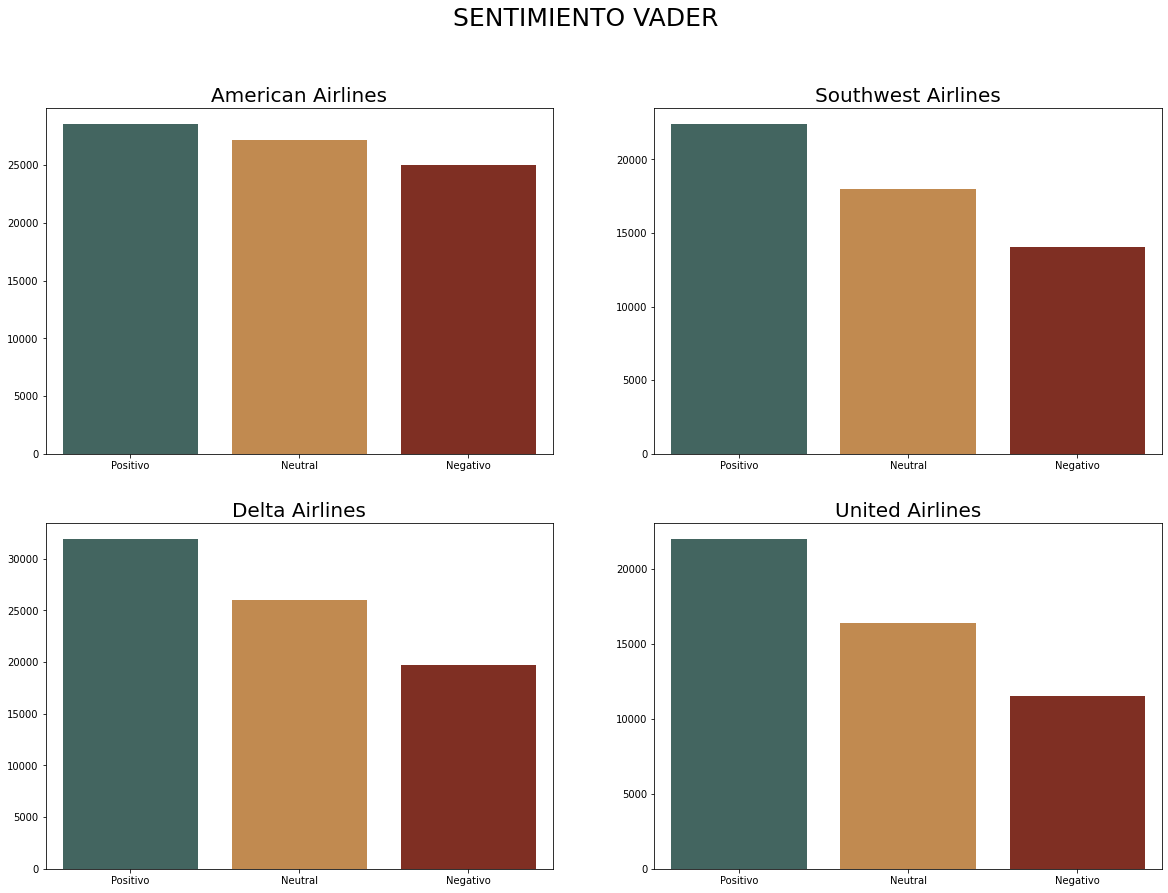

In [25]:
# Se establece la figura y los ejes
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(20,14)
fig.suptitle('SENTIMIENTO VADER', fontsize=25)

# Se crean los gráficos
sns.countplot(x = "vader-sentiment-analysis", data = df_american, ax = ax[0, 0], 
              palette = dict(Negativo="#8e2414", Positivo="#3d6b64", Neutral="#d48b3d"), 
              order = ['Positivo', 'Neutral', 'Negativo']).set_title('American Airlines', fontsize = 20);
sns.countplot(x = "vader-sentiment-analysis", data = df_delta, ax = ax[1, 0], 
              palette = dict(Negativo="#8e2414", Positivo="#3d6b64", Neutral="#d48b3d"), 
              order = ['Positivo', 'Neutral', 'Negativo']).set_title('Delta Airlines', fontsize = 20);
sns.countplot(x = "vader-sentiment-analysis", data = df_southwest, ax = ax[0, 1], 
              palette = dict(Negativo="#8e2414", Positivo="#3d6b64", Neutral="#d48b3d"), 
              order = ['Positivo', 'Neutral', 'Negativo']).set_title('Southwest Airlines', fontsize = 20);
sns.countplot(x = "vader-sentiment-analysis", data = df_united, ax = ax[1, 1], 
              palette = dict(Negativo="#8e2414", Positivo="#3d6b64", Neutral="#d48b3d"), 
              order = ['Positivo', 'Neutral', 'Negativo']).set_title('United Airlines', fontsize = 20);

# Se eliminan las etiquestas de los ejes al no considerarse necesarias
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('')
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')

plt.savefig('sentimiento-vader-numeros-totales.pdf')
plt.show()

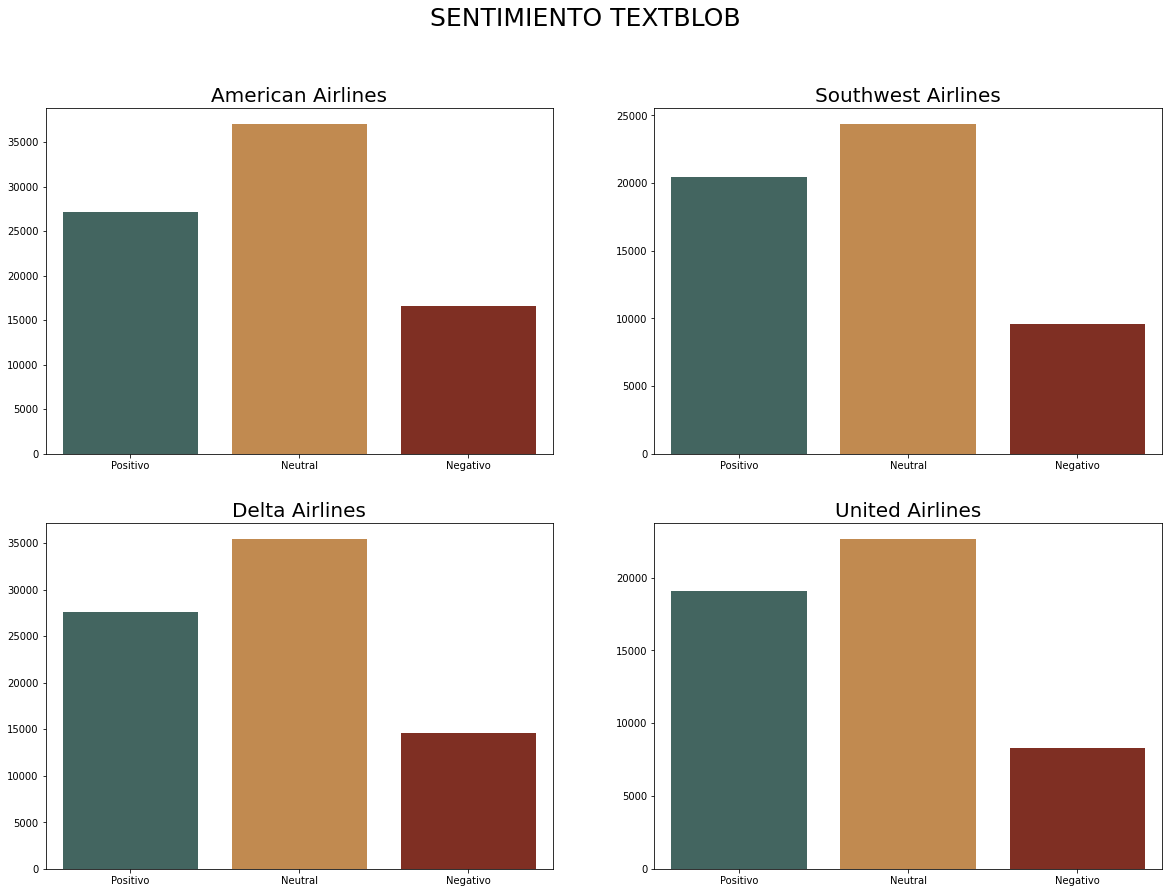

In [26]:
# Se establece la figura y los ejes
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(20,14)
fig.suptitle('SENTIMIENTO TEXTBLOB', fontsize=25)

# Se crean los gráficos
sns.countplot(x = "textblob-sentiment-analysis", data = df_american, ax = ax[0, 0], 
              palette = dict(Negativo="#8e2414", Positivo="#3d6b64", Neutral="#d48b3d"), 
              order = ['Positivo', 'Neutral', 'Negativo']).set_title('American Airlines', fontsize = 20);
sns.countplot(x = "textblob-sentiment-analysis", data = df_delta, ax = ax[1, 0], 
              palette = dict(Negativo="#8e2414", Positivo="#3d6b64", Neutral="#d48b3d"), 
              order = ['Positivo', 'Neutral', 'Negativo']).set_title('Delta Airlines', fontsize = 20);
sns.countplot(x = "textblob-sentiment-analysis", data = df_southwest, ax = ax[0, 1], 
              palette = dict(Negativo="#8e2414", Positivo="#3d6b64", Neutral="#d48b3d"), 
              order = ['Positivo', 'Neutral', 'Negativo']).set_title('Southwest Airlines', fontsize = 20);
sns.countplot(x = "textblob-sentiment-analysis", data = df_united, ax = ax[1, 1], 
              palette = dict(Negativo="#8e2414", Positivo="#3d6b64", Neutral="#d48b3d"), 
              order = ['Positivo', 'Neutral', 'Negativo']).set_title('United Airlines', fontsize = 20);

# Se eliminan las etiquestas de los ejes al no considerarse necesarias
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('')
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')

plt.savefig('sentimiento-textblob-numeros-totales.pdf')
plt.show()

Aparte de los gráficos, también se muestran los números totales en formato gráfica para un mayor entendimiento. Primero para VADER:

In [27]:
columns = ['Positivo', 'Neutral', 'Negativo', 'Total']
rows = ['American Airlines', 'Delta Airlines', 'Southwest Airlines', 'United Airlines']

data = [list(df_american['vader-sentiment-analysis'].value_counts().sort_index(ascending = False).values) + [df_american.shape[0]],
        list(df_delta['vader-sentiment-analysis'].value_counts().sort_index(ascending = False).values) + [df_delta.shape[0]],
        list(df_southwest['vader-sentiment-analysis'].value_counts().sort_index(ascending = False).values) + [df_southwest.shape[0]],
        list(df_united['vader-sentiment-analysis'].value_counts().sort_index(ascending = False).values) + [df_united.shape[0]]]

df_sentiment_totales_vader = pd.DataFrame(data, columns = columns, index = rows)
df_sentiment_totales_vader.head()

,Positivo,Neutral,Negativo,Total
American Airlines,28548,27161,24978,80687
Delta Airlines,31858,26027,19699,77584
Southwest Airlines,22389,17959,14031,54379
United Airlines,21997,16432,11544,49973


Se guarda como csv:

In [28]:
df_sentiment_totales_vader.to_csv('df_sentiment_totales_vader.csv', index = True)

A continuación se hace lo mismo para TextBlob:

In [29]:
columns = ['Positivo', 'Neutral', 'Negativo', 'Total']
rows = ['American Airlines', 'Delta Airlines', 'Southwest Airlines', 'United Airlines']

data = [list(df_american['textblob-sentiment-analysis'].value_counts().sort_index(ascending = False).values) + [df_american.shape[0]],
        list(df_delta['textblob-sentiment-analysis'].value_counts().sort_index(ascending = False).values) + [df_delta.shape[0]],
        list(df_southwest['textblob-sentiment-analysis'].value_counts().sort_index(ascending = False).values) + [df_southwest.shape[0]],
        list(df_united['textblob-sentiment-analysis'].value_counts().sort_index(ascending = False).values) + [df_united.shape[0]]]

df_sentiment_totales_textblob = pd.DataFrame(data, columns = columns, index = rows)
df_sentiment_totales_textblob.head()

,Positivo,Neutral,Negativo,Total
American Airlines,27149,36995,16543,80687
Delta Airlines,27595,35397,14592,77584
Southwest Airlines,20459,24350,9570,54379
United Airlines,19072,22630,8271,49973


In [30]:
df_sentiment_totales_textblob.to_csv('df_sentiment_totales_textblob.csv', index = True)

Las conclusiones que se pueden extraer de los números totales obtenidos es que, en primer lugar, American Airlines y Delta son las que tienen una mayor interacción por Twitter, seguidas por Southwest y por último United. Analizando los resultados por clasificador:

- VADER: para todas las aerolíneas los valores positivos superan a los negativos, lo cuál es una buena señal, pero que requiere un análisis más profundo que se llevará a cabo posteriomente. También se evidencia lo comentado anteriormente con respecto a la sensibilidad del clasificador ya que la mayoría son tweets positivos, lo que contrasta con los valores del otro analizador.


- TextBlob: en este caso la mayoría de tweets con clasificados como neutros, con una gran diferencia, por lo que es menos sensible a la hora de detectar sentimientos. Aunque con números totales más bajos, también se evidencia una clara superioridad en el número de positivos comparados con los negativos

Se generan en porcentaje respecto al total para cada categoría:

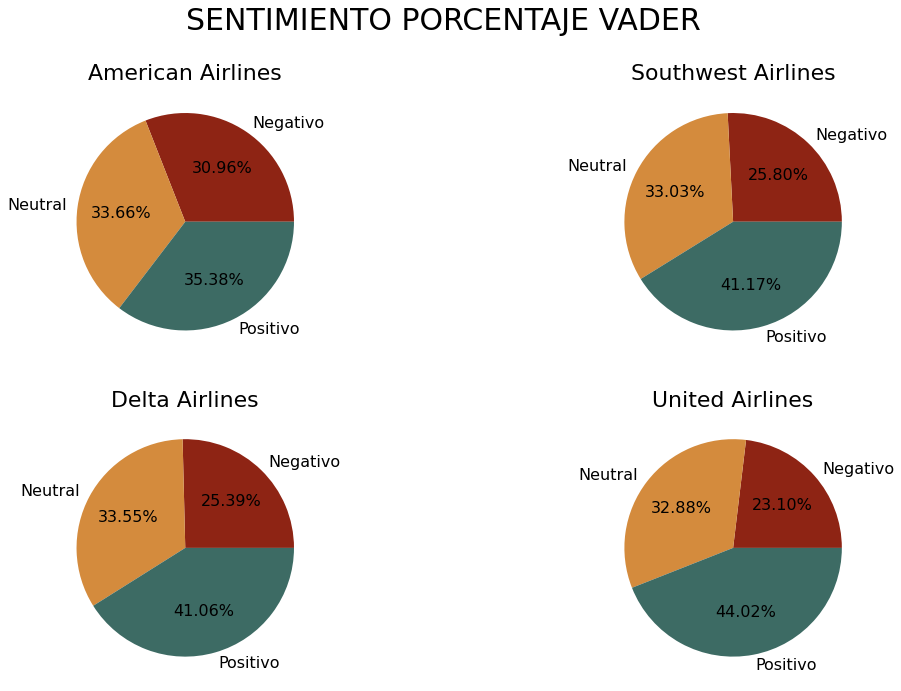

In [31]:
# Se establece la figura y los ejes
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(18,11)
fig.suptitle('SENTIMIENTO PORCENTAJE VADER', fontsize=30)

# Se crean los gráficos
ax[0,0].pie(list(df_american['vader-sentiment-analysis'].value_counts().sort_index().values),
            labels = list(df_american['vader-sentiment-analysis'].value_counts().sort_index().index), 
            autopct='%.2f%%', colors = ["#8e2414", "#d48b3d", "#3d6b64"], textprops={'fontsize': 16})
ax[0,0].set_title('American Airlines', fontsize = 22)

ax[1,0].pie(list(df_delta['vader-sentiment-analysis'].value_counts().sort_index().values),
            labels = list(df_delta['vader-sentiment-analysis'].value_counts().sort_index().index), 
            autopct='%.2f%%', colors = ["#8e2414", "#d48b3d", "#3d6b64"], textprops={'fontsize': 16})
ax[1,0].set_title('Delta Airlines', fontsize = 22)

ax[0,1].pie(list(df_southwest['vader-sentiment-analysis'].value_counts().sort_index().values),
            labels = list(df_southwest['vader-sentiment-analysis'].value_counts().sort_index().index), 
            autopct='%.2f%%', colors = ["#8e2414", "#d48b3d", "#3d6b64"], textprops={'fontsize': 16})
ax[0,1].set_title('Southwest Airlines', fontsize = 22)

ax[1,1].pie(list(df_united['vader-sentiment-analysis'].value_counts().sort_index().values),
            labels = list(df_united['vader-sentiment-analysis'].value_counts().sort_index().index), 
            autopct='%.2f%%', colors = ["#8e2414", "#d48b3d", "#3d6b64"], textprops={'fontsize': 16})
ax[1,1].set_title('United Airlines', fontsize = 22)

plt.savefig('sentimiento-vader-porcentajes.pdf')
plt.show()

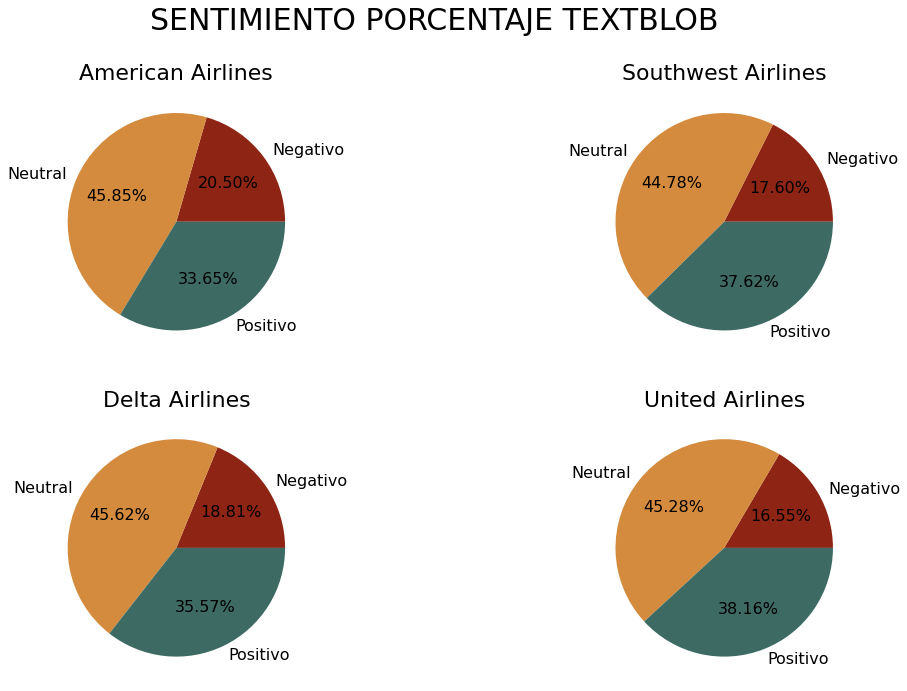

In [32]:
# Se establece la figura y los ejes
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(18,11)
fig.suptitle('SENTIMIENTO PORCENTAJE TEXTBLOB', fontsize=30)

# Se crean los gráficos
ax[0,0].pie(list(df_american['textblob-sentiment-analysis'].value_counts().sort_index().values),
            labels = list(df_american['textblob-sentiment-analysis'].value_counts().sort_index().index), 
            autopct='%.2f%%', colors = ["#8e2414", "#d48b3d", "#3d6b64"], textprops={'fontsize': 16})
ax[0,0].set_title('American Airlines', fontsize = 22)

ax[1,0].pie(list(df_delta['textblob-sentiment-analysis'].value_counts().sort_index().values),
            labels = list(df_delta['textblob-sentiment-analysis'].value_counts().sort_index().index), 
            autopct='%.2f%%', colors = ["#8e2414", "#d48b3d", "#3d6b64"], textprops={'fontsize': 16})
ax[1,0].set_title('Delta Airlines', fontsize = 22)

ax[0,1].pie(list(df_southwest['textblob-sentiment-analysis'].value_counts().sort_index().values),
            labels = list(df_southwest['textblob-sentiment-analysis'].value_counts().sort_index().index), 
            autopct='%.2f%%', colors = ["#8e2414", "#d48b3d", "#3d6b64"], textprops={'fontsize': 16})
ax[0,1].set_title('Southwest Airlines', fontsize = 22)

ax[1,1].pie(list(df_united['textblob-sentiment-analysis'].value_counts().sort_index().values),
            labels = list(df_united['textblob-sentiment-analysis'].value_counts().sort_index().index), 
            autopct='%.2f%%', colors = ["#8e2414", "#d48b3d", "#3d6b64"], textprops={'fontsize': 16})
ax[1,1].set_title('United Airlines', fontsize = 22)

plt.savefig('sentimiento-textblob-porcentajes.pdf')
plt.show()

Los porcentajes ayudan a conocer como se distribuyen los sentimientos por aerolínea para cada sentimiento:

- VADER: el porcentaje de tweets neutros es muy similar en todos lo casos, exisitiendo diferencias en los porcentajes positivos y negativos, donde se aprecia como American Airlines es la aerolínea con un mayor porcentaje negativo, por lo que se entiende que es la que recibe más críticas/quejas por Twitter, mientras que United, que es la que tiene una interacción menor, pero es la más positiva. En cuanto a Southwest y Delta tienen una interacción muy similar.


- TextBlob: las conclusiones que se pueden sacar son muy similares. El porcentaje de tweets clasificados como neutros para cada aerolínea es prácticamente el mismo. Nuevamente American Airlines es la que recibe una peor crítica, aunque con una menor diferencia que en el caso anterior. United vuelve a ser la que recibe una interacción más positiva, mientras que Delta y Southwest vuelven a tener valore similares, pero en este caso sí que se puede concluir que Southwest recibe una interacción más positiva que Delta. También cabe destacar que los resultados en este caso son más parejos que en el anterior.

#### Media por Sentimiento y Aerolínea

Para cada aerolínea se pretende obtener la media de los valores numéricos de cada sentimiento, con el objetivo de no conocer solo la cantidad de tweets totales que se han clasificado en un sentimiento, sino conocer el valor numérico con el que se han clasificado.

Primero se obtienen los valores para VADER:

In [33]:
columns = ['Positivo', 'Neutral', 'Negativo', 'Total']
rows = ['American Airlines', 'Delta Airlines', 'Southwest Airlines', 'United Airlines']

data = [[round(df_american['vader-sentiment'][df_american['vader-sentiment-analysis'] == 'Positivo'].mean(),3),
         round(df_american['vader-sentiment'][df_american['vader-sentiment-analysis'] == 'Neutral'].mean(),3),
         round(df_american['vader-sentiment'][df_american['vader-sentiment-analysis'] == 'Negativo'].mean(),3),
         round(df_american['vader-sentiment'].mean(),3)],
        [round(df_delta['vader-sentiment'][df_delta['vader-sentiment-analysis'] == 'Positivo'].mean(),3),
         round(df_delta['vader-sentiment'][df_delta['vader-sentiment-analysis'] == 'Neutral'].mean(),3),
         round(df_delta['vader-sentiment'][df_delta['vader-sentiment-analysis'] == 'Negativo'].mean(),3),
         round(df_delta['vader-sentiment'].mean(),3)],
        [round(df_southwest['vader-sentiment'][df_southwest['vader-sentiment-analysis'] == 'Positivo'].mean(),3),
         round(df_southwest['vader-sentiment'][df_southwest['vader-sentiment-analysis'] == 'Neutral'].mean(),3),
         round(df_southwest['vader-sentiment'][df_southwest['vader-sentiment-analysis'] == 'Negativo'].mean(),3),
         round(df_southwest['vader-sentiment'].mean(),3)],
        [round(df_united['vader-sentiment'][df_united['vader-sentiment-analysis'] == 'Positivo'].mean(),3),
         round(df_united['vader-sentiment'][df_united['vader-sentiment-analysis'] == 'Neutral'].mean(),3),
         round(df_united['vader-sentiment'][df_united['vader-sentiment-analysis'] == 'Negativo'].mean(),3),
         round(df_united['vader-sentiment'].mean(),3)]]

df_vader_sentiment_mean = pd.DataFrame(data, columns = columns, index = rows)
df_vader_sentiment_mean.head()

,Positivo,Neutral,Negativo,Total
American Airlines,0.460,0.0,-0.431,0.029
Delta Airlines,0.481,0.0,-0.412,0.093
Southwest Airlines,0.492,0.0,-0.409,0.097
United Airlines,0.495,0.0,-0.414,0.122


In [34]:
df_vader_sentiment_mean.to_csv('df_vader_sentiment_mean.csv', index = True)

Ahora se obtienen para TextBlob:

In [35]:
columns = ['Positivo', 'Neutral', 'Negativo', 'Total']
rows = ['American Airlines', 'Delta Airlines', 'Southwest Airlines', 'United Airlines']

data = [[round(df_american['textblob-sentiment'][df_american['textblob-sentiment-analysis'] == 'Positivo'].mean(),3),
         round(df_american['textblob-sentiment'][df_american['textblob-sentiment-analysis'] == 'Neutral'].mean(),3),
         round(df_american['textblob-sentiment'][df_american['textblob-sentiment-analysis'] == 'Negativo'].mean(),3),
         round(df_american['textblob-sentiment'].mean(),3)],
        [round(df_delta['textblob-sentiment'][df_delta['textblob-sentiment-analysis'] == 'Positivo'].mean(),3),
         round(df_delta['textblob-sentiment'][df_delta['textblob-sentiment-analysis'] == 'Neutral'].mean(),3),
         round(df_delta['textblob-sentiment'][df_delta['textblob-sentiment-analysis'] == 'Negativo'].mean(),3),
         round(df_delta['textblob-sentiment'].mean(),3)],
        [round(df_southwest['textblob-sentiment'][df_southwest['textblob-sentiment-analysis'] == 'Positivo'].mean(),3),
         round(df_southwest['textblob-sentiment'][df_southwest['textblob-sentiment-analysis'] == 'Neutral'].mean(),3),
         round(df_southwest['textblob-sentiment'][df_southwest['textblob-sentiment-analysis'] == 'Negativo'].mean(),3),
         round(df_southwest['textblob-sentiment'].mean(),3)],
        [round(df_united['textblob-sentiment'][df_united['textblob-sentiment-analysis'] == 'Positivo'].mean(),3),
         round(df_united['textblob-sentiment'][df_united['textblob-sentiment-analysis'] == 'Neutral'].mean(),3),
         round(df_united['textblob-sentiment'][df_united['textblob-sentiment-analysis'] == 'Negativo'].mean(),3),
         round(df_united['textblob-sentiment'].mean(),3)]]

df_textblob_sentiment_mean = pd.DataFrame(data, columns = columns, index = rows)
df_textblob_sentiment_mean.head()

,Positivo,Neutral,Negativo,Total
American Airlines,0.338,0.0,-0.347,0.043
Delta Airlines,0.359,0.0,-0.332,0.065
Southwest Airlines,0.358,0.0,-0.328,0.077
United Airlines,0.358,0.0,-0.325,0.083


In [36]:
df_textblob_sentiment_mean.to_csv('df_textblob_sentiment_mean.csv', index = True)

Se vuelven a apreciar conclusiones que ya se habían comentado con datos anteriormente:

- VADER: en cuanto a los valores positivos, American Airlines, que tenía un porcentaje más bajo respecto al total, aunque en números totales tuviera más, es la que tiene una media más baja mientras que United es la que tiene una media más alta, que era la que tenía un mayor porcentaje respecto al total de tweets positivos, por loq ue es la que tiene una myor interacctión positiva a todos los niveles. Por otra parte, Delta y Southwest que tenían valores porcentuales muy similares, en este caso sí que se aprecia una diferencia teniendo una media superior Southwest. En cuanto a los tweets negativos, Delta, United y Souhtwest tienen una media muy similar, pero American tiene la peor media de todas con diferencia, por lo que en este aspecto también destaca negativamente.


- TextBlob: nuevamente resultados similares a los anteriores, pero con variaciones. En cuanto a los tweets positivos Delta, United y Souhtwest tienen prácticamente la misma media, mientras que se aprecia una clara diferencia con American siendo esta la peor. En cuanto a los negativos, American vuelve a destacar con el peor resultado, y en este caso hay una diferencia algo mayor que en el analzidor VADER, siendo la mejor aerolínea United seguida de Southwest y luego Delta, pero con valores muy similares.

#### Conjuntos de palabras más comunes

Se pretende obtener los bigrams más comunes para cada aerolínea y analizar su sentimiento.

Para ello se hace uso del CounVectorizer de scikit learn:

In [37]:
cvec_american = CountVectorizer(ngram_range=(2,2), min_df = 150)
cvec_delta = CountVectorizer(ngram_range=(2,2), min_df = 150)
cvec_southwest = CountVectorizer(ngram_range=(2,2), min_df = 150)
cvec_united = CountVectorizer(ngram_range=(2,2), min_df = 150)

Se crea un modelo para cada aerolínea

In [38]:
ngrams_american = cvec_american.fit_transform(df_american['text'])
ngrams_delta = cvec_delta.fit_transform(df_delta['text'])
ngrams_southwest = cvec_southwest.fit_transform(df_southwest['text'])
ngrams_united = cvec_united.fit_transform(df_united['text'])

Se cuenta la frecuencia:

In [39]:
count_values_american = ngrams_american.toarray().sum(axis=0)
count_values_delta = ngrams_delta.toarray().sum(axis=0)
count_values_southwest = ngrams_southwest.toarray().sum(axis=0)
count_values_united = ngrams_united.toarray().sum(axis=0)

Se crean los dataframes que contienen los resultados

In [40]:
vocab_american = cvec_american.vocabulary_
df_ngram_american = pd.DataFrame(sorted([(count_values_american[i], k) for k,i in vocab_american.items()], 
                                        reverse=True)).rename(columns={0: 'frequency', 1:'bigram'})

vocab_delta = cvec_delta.vocabulary_
df_ngram_delta = pd.DataFrame(sorted([(count_values_delta[i], k) for k,i in vocab_delta.items()], 
                                        reverse=True)).rename(columns={0: 'frequency', 1:'bigram'})

vocab_southwest = cvec_southwest.vocabulary_
df_ngram_southwest = pd.DataFrame(sorted([(count_values_southwest[i], k) for k,i in vocab_southwest.items()], 
                                        reverse=True)).rename(columns={0: 'frequency', 1:'bigram'})

vocab_united = cvec_united.vocabulary_
df_ngram_united = pd.DataFrame(sorted([(count_values_united[i], k) for k,i in vocab_united.items()], 
                                      reverse=True)).rename(columns={0: 'frequency', 1:'bigram'})


A continuación, para los 25 conjuntos de palabras más comunes para cada aerolínea se va a hacer un análisis de su sentimiento.

In [41]:
df_ngram_american_25 = df_ngram_american.head(25)
df_ngram_delta_25 = df_ngram_delta.head(25)
df_ngram_southwest_25 = df_ngram_southwest.head(25)
df_ngram_united_25 = df_ngram_united.head(25)

In [42]:
df_ngram_american_25['textblob-sentiment'] = df_ngram_american_25['bigram'].apply(lambda text: TextBlob(text).sentiment.polarity)
df_ngram_american_25['textblob-sentiment-analysis'] = df_ngram_american_25['textblob-sentiment'].apply(textblob_sentiment_texto)
df_ngram_american_25['vader-sentiment'] = df_ngram_american_25['bigram'].apply(vader_sentiment_analysis)
df_ngram_american_25['vader-sentiment-analysis'] = df_ngram_american_25['vader-sentiment'].apply(textblob_sentiment_texto)

df_ngram_delta_25['textblob-sentiment'] = df_ngram_delta_25['bigram'].apply(lambda text: TextBlob(text).sentiment.polarity)
df_ngram_delta_25['textblob-sentiment-analysis'] = df_ngram_delta_25['textblob-sentiment'].apply(textblob_sentiment_texto)
df_ngram_delta_25['vader-sentiment'] = df_ngram_delta_25['bigram'].apply(vader_sentiment_analysis)
df_ngram_delta_25['vader-sentiment-analysis'] = df_ngram_delta_25['vader-sentiment'].apply(textblob_sentiment_texto)

df_ngram_southwest_25['textblob-sentiment'] = df_ngram_southwest_25['bigram'].apply(lambda text: TextBlob(text).sentiment.polarity)
df_ngram_southwest_25['textblob-sentiment-analysis'] = df_ngram_southwest_25['textblob-sentiment'].apply(textblob_sentiment_texto)
df_ngram_southwest_25['vader-sentiment'] = df_ngram_southwest_25['bigram'].apply(vader_sentiment_analysis)
df_ngram_southwest_25['vader-sentiment-analysis'] = df_ngram_southwest_25['vader-sentiment'].apply(textblob_sentiment_texto)

df_ngram_united_25['textblob-sentiment'] = df_ngram_united_25['bigram'].apply(lambda text: TextBlob(text).sentiment.polarity)
df_ngram_united_25['textblob-sentiment-analysis'] = df_ngram_united_25['textblob-sentiment'].apply(textblob_sentiment_texto)
df_ngram_united_25['vader-sentiment'] = df_ngram_united_25['bigram'].apply(vader_sentiment_analysis)
df_ngram_united_25['vader-sentiment-analysis'] = df_ngram_united_25['vader-sentiment'].apply(textblob_sentiment_texto)

Se guardan los resultados:

In [43]:
df_ngram_american_25.to_csv('df_ngram_american_25.csv', index = True)
df_ngram_delta_25.to_csv('df_ngram_delta_25.csv', index = True)
df_ngram_southwest_25.to_csv('df_ngram_southwest_25.csv', index = True)
df_ngram_united_25.to_csv('df_ngram_united_25.csv', index = True)

Por último, se muestran por pantalla los bigrams más comunes para cada aerolínea:

In [44]:
df_ngram_american_25.head(25)

,frequency,bigram,textblob-sentiment,textblob-sentiment-analysis,vader-sentiment,vader-sentiment-analysis
0,1357,customer service,0.00,Neutral,0.0000,Neutral
1,869,skin tone,0.00,Neutral,0.0000,Neutral
2,842,cheap flights,0.40,Positivo,0.0000,Neutral
3,818,tears joy,0.80,Positivo,0.4404,Positivo
4,811,face tears,0.00,Neutral,-0.2263,Negativo
5,786,us cheap,0.40,Positivo,0.0000,Neutral
6,667,flight attendant,0.20,Positivo,0.0000,Neutral
7,552,flight attendants,0.00,Neutral,0.0000,Neutral
8,497,first class,0.25,Positivo,0.0000,Neutral
9,488,smiling face,0.00,Neutral,0.4588,Positivo


Uno de los primeros bigrams que destaca es "cheap flights", que no necesariamente tiene que tener un sentimiento positivo, y que TextBlob lo detecta por la palabra cheap, es decir, tiene asociado un sentimiento positivo a cheap. Después vemos "tears joy" que es el resultado de la limpieza del emoji 😂, por lo que se entiende que su snetimiento sea positiv. Otros emojis/emoticones que son detectados son "smiling face" 😊, "floor laughing" 🤣 o face smiley =), claramente de sentimiento positivo, aunque TextBlob no detecta ninguno de los dos o, por otro lado, "crying face" 😢, "loudly crying" 😭, de sentimiento negativo y que es detectado por ambos analizadores. También destaca, de alta importancia en el análisis de este campo, los bigrams "flight delayed", "cancelled flight" y "flight cancelled", que obviamente muestran una situación negativa y de desagrado para el pasajero, de la cuál es bastante probable que se esté quejando, y que TextBlob clasifica como Neutral mientras que VADER lo hace como Negativo.

De esta forma se observa que para la aerolínea American Airlines los bigrams positivos provienen de la conversión de los emojis o emoticonos a palabras, mientras que los negativvos, también en parte de dicha convversión, pero otros términos provienen de problemas que pueden surgir a la hora de coger un vuelo.

In [45]:
df_ngram_delta_25.head(25)

,frequency,bigram,textblob-sentiment,textblob-sentiment-analysis,vader-sentiment,vader-sentiment-analysis
0,1732,customer service,0.00,Neutral,0.0000,Neutral
1,1105,skin tone,0.00,Neutral,0.0000,Neutral
2,1089,tears joy,0.80,Positivo,0.4404,Positivo
3,1074,delta variant,0.00,Neutral,0.0000,Neutral
4,1071,face tears,0.00,Neutral,-0.2263,Negativo
5,686,hold hours,0.00,Neutral,0.0000,Neutral
6,597,smiling face,0.00,Neutral,0.4588,Positivo
7,580,crying face,-0.20,Negativo,-0.4767,Negativo
8,547,first class,0.25,Positivo,0.0000,Neutral
9,519,rolling floor,0.00,Neutral,0.0000,Neutral


En cuanto a los emoticonos y emojis se aprecia algo muy similar a lo comentado en el caso anterior. En cuanto a otros términos que destacen para Delta, el principal puede ser "delta variant", que evidentemente hace referencia a la variante delta del virus covid. Hay dos términos como "please help" y "need help" que VADER los detecta como algo positivo, lo cual no siempre tiene que por qué ser así, y también destaca otro término relacionado con las aerolíneas comoo es "change flight" que de por sí es de sentimiento neutro.

In [46]:
df_ngram_southwest_25.head(25)

,frequency,bigram,textblob-sentiment,textblob-sentiment-analysis,vader-sentiment,vader-sentiment-analysis
0,829,flight attendant,0.2,Positivo,0.0000,Neutral
1,760,away heading,0.0,Neutral,0.0000,Neutral
2,729,skin tone,0.0,Neutral,0.0000,Neutral
3,719,customer service,0.0,Neutral,0.0000,Neutral
4,714,boeing ng,0.0,Neutral,0.0000,Neutral
5,578,tears joy,0.8,Positivo,0.4404,Positivo
6,572,face tears,0.0,Neutral,-0.2263,Negativo
7,528,red heart,0.0,Neutral,0.6369,Positivo
8,501,smiling face,0.0,Neutral,0.4588,Positivo
9,434,flight attendants,0.0,Neutral,0.0000,Neutral


En el caso de Southwest, en cuanto a los emojis destacan, como novedad, tanto "red heart" como "blue heart" que hacen referencia a ❤️ y 💙 respectivamente, lo que VADER entienede como algo positivo. Vuelven a aparecer como términos negativos relacionado con las aerolíneas flight delayed	y cancelled flight aunque en menor cantidad que en el caso de American Airlines, y también aparecen términos relacionados con la vacunación.

In [47]:
df_ngram_united_25.head(25)

,frequency,bigram,textblob-sentiment,textblob-sentiment-analysis,vader-sentiment,vader-sentiment-analysis
0,679,customer service,0.00,Neutral,0.0000,Neutral
1,600,skin tone,0.00,Neutral,0.0000,Neutral
2,545,cheap flights,0.40,Positivo,0.0000,Neutral
3,537,us cheap,0.40,Positivo,0.0000,Neutral
4,476,clapping hands,0.00,Neutral,0.0000,Neutral
5,423,get vaccinated,0.00,Neutral,0.0000,Neutral
6,407,vaccine mandate,0.00,Neutral,0.0000,Neutral
7,396,employees vaccinated,0.00,Neutral,0.0000,Neutral
8,387,smiling face,0.00,Neutral,0.4588,Positivo
9,380,tears joy,0.80,Positivo,0.4404,Positivo


En el caso de United vuelven a aparecer varios términos relacionados con la vacunación, considerándose todos como neutrales, varios emojis ya comentados aunqeu en menor medida y detaca quizá el bigram "united states" en clara referencia al nombre del país, y que VADER detecta como algo positivo.

Para concluir el análisis derivado de los bigrams obtenidos:
    
- VADER demuestra una mayor capacidad para procesar la traducción de los emojis/emoticonos a texto habiendo detectado todos los que aparecían entre los más comunes.También es capaz de detectar como algo negativo la cancelación o el retraso de un vuelo, algo que se considera vital en un analziador de sentimiento para la interacción de los pasajeros con la aerolínea por Twitter, es por ello que en caso de tener que hacer uso de uno de los dos analziadores en futuros estudios sería más conveniente utilizar VADER. 


- En cuanto a las aerolíneas, seguramente lo más destacado sea la alta presencia de términos negativos que se encuentran en la aerolínea American Airlines. Ya salía en otros gráficos como la aerolínea que recibía una mayor interacción negativa, y aquí también se comprueba debido a los bigrams de cancelación y retraso de vuelo que parece ser un problema recurrente para American Airlines y que deberían cuidar para ofrecer un mayor servicio. Southwest también muestra este problema, pero en menor medida, mientras que no aparece ni para Delta ni para United


#### Referencias

* VADER Documentation: https://github.com/cjhutto/vaderSentiment
* TextBlob Documentation: https://textblob.readthedocs.io/en/dev/
* Post de referencia para conseguir los bigrams: https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5